# Fogo em Florestas
Fernando VIlela Brandão 2021421907

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Parte 1

In [109]:

def inicializa_floresta(L):
    floresta = np.zeros((L, L), dtype=int)
    return floresta

In [110]:

def crescimento(floresta, p):
    L = floresta.shape[0]  
    for i in range(L):
        for j in range(L):
            if floresta[i, j] == 0:
                if np.random.rand() <= p:
                    floresta[i, j] = 1

In [111]:

def raio(floresta, f):
 
    L = floresta.shape[0]
    if np.random.rand() < f:
        i, j = np.random.randint(0, L, size=2)
        if floresta[i, j] == 1:
            return incendiar(floresta, i, j)
    return []

In [112]:

def incendiar(floresta, i, j):
    L = floresta.shape[0]
    pilha = [(i, j)]
    queimadas = []

    while pilha:
        x, y = pilha.pop()
        floresta[x, y] = 0  # Queima a árvore
        queimadas.append((x, y))
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx = x + dx
            ny = y + dy
            if 0 <= nx < L and 0 <= ny < L and floresta[nx, ny] == 1:
                pilha.append((nx, ny))

    return queimadas


In [113]:

def visualizar(floresta, queimadas=None, passo=None, max_passos=None):
    L = floresta.shape[0]
    x, y = np.meshgrid(range(L), range(L))
    x = x.flatten()
    y = y.flatten()
            
    cols = 5
    rows = (max_passos + cols - 1) // cols  # Divide e arredonda para cima
            
    plt.subplot(rows, cols, passo + 1)
    plt.scatter(y, x, c=floresta.flatten(), cmap='Greens', marker='^')
    if queimadas:
        queimadas = np.array(queimadas)
        plt.scatter(queimadas[:, 0], queimadas[:, 1], color='red', marker='^')
    plt.title(f'Passo {passo + 1}', fontsize=10)
    plt.grid(True, color='black')
    plt.xlabel('Coluna')
    plt.ylabel('Linha')
    plt.xticks(np.arange(0, L, 1))
    plt.yticks(np.arange(0, L, 1))
    


## 1a e 1b

In [114]:

def simular1a(L, T, p, f):
    floresta = inicializa_floresta(L)
    
    plt.figure(figsize=(25, (T // 5 + 1) * 3))  # Ajuste a altura para evitar sobreposição
    for t in range(T):
        crescimento(floresta, p)
        queimadas = raio(floresta, f)
        visualizar(floresta, queimadas=queimadas, passo=t, max_passos=T)
    plt.tight_layout()
    plt.show()


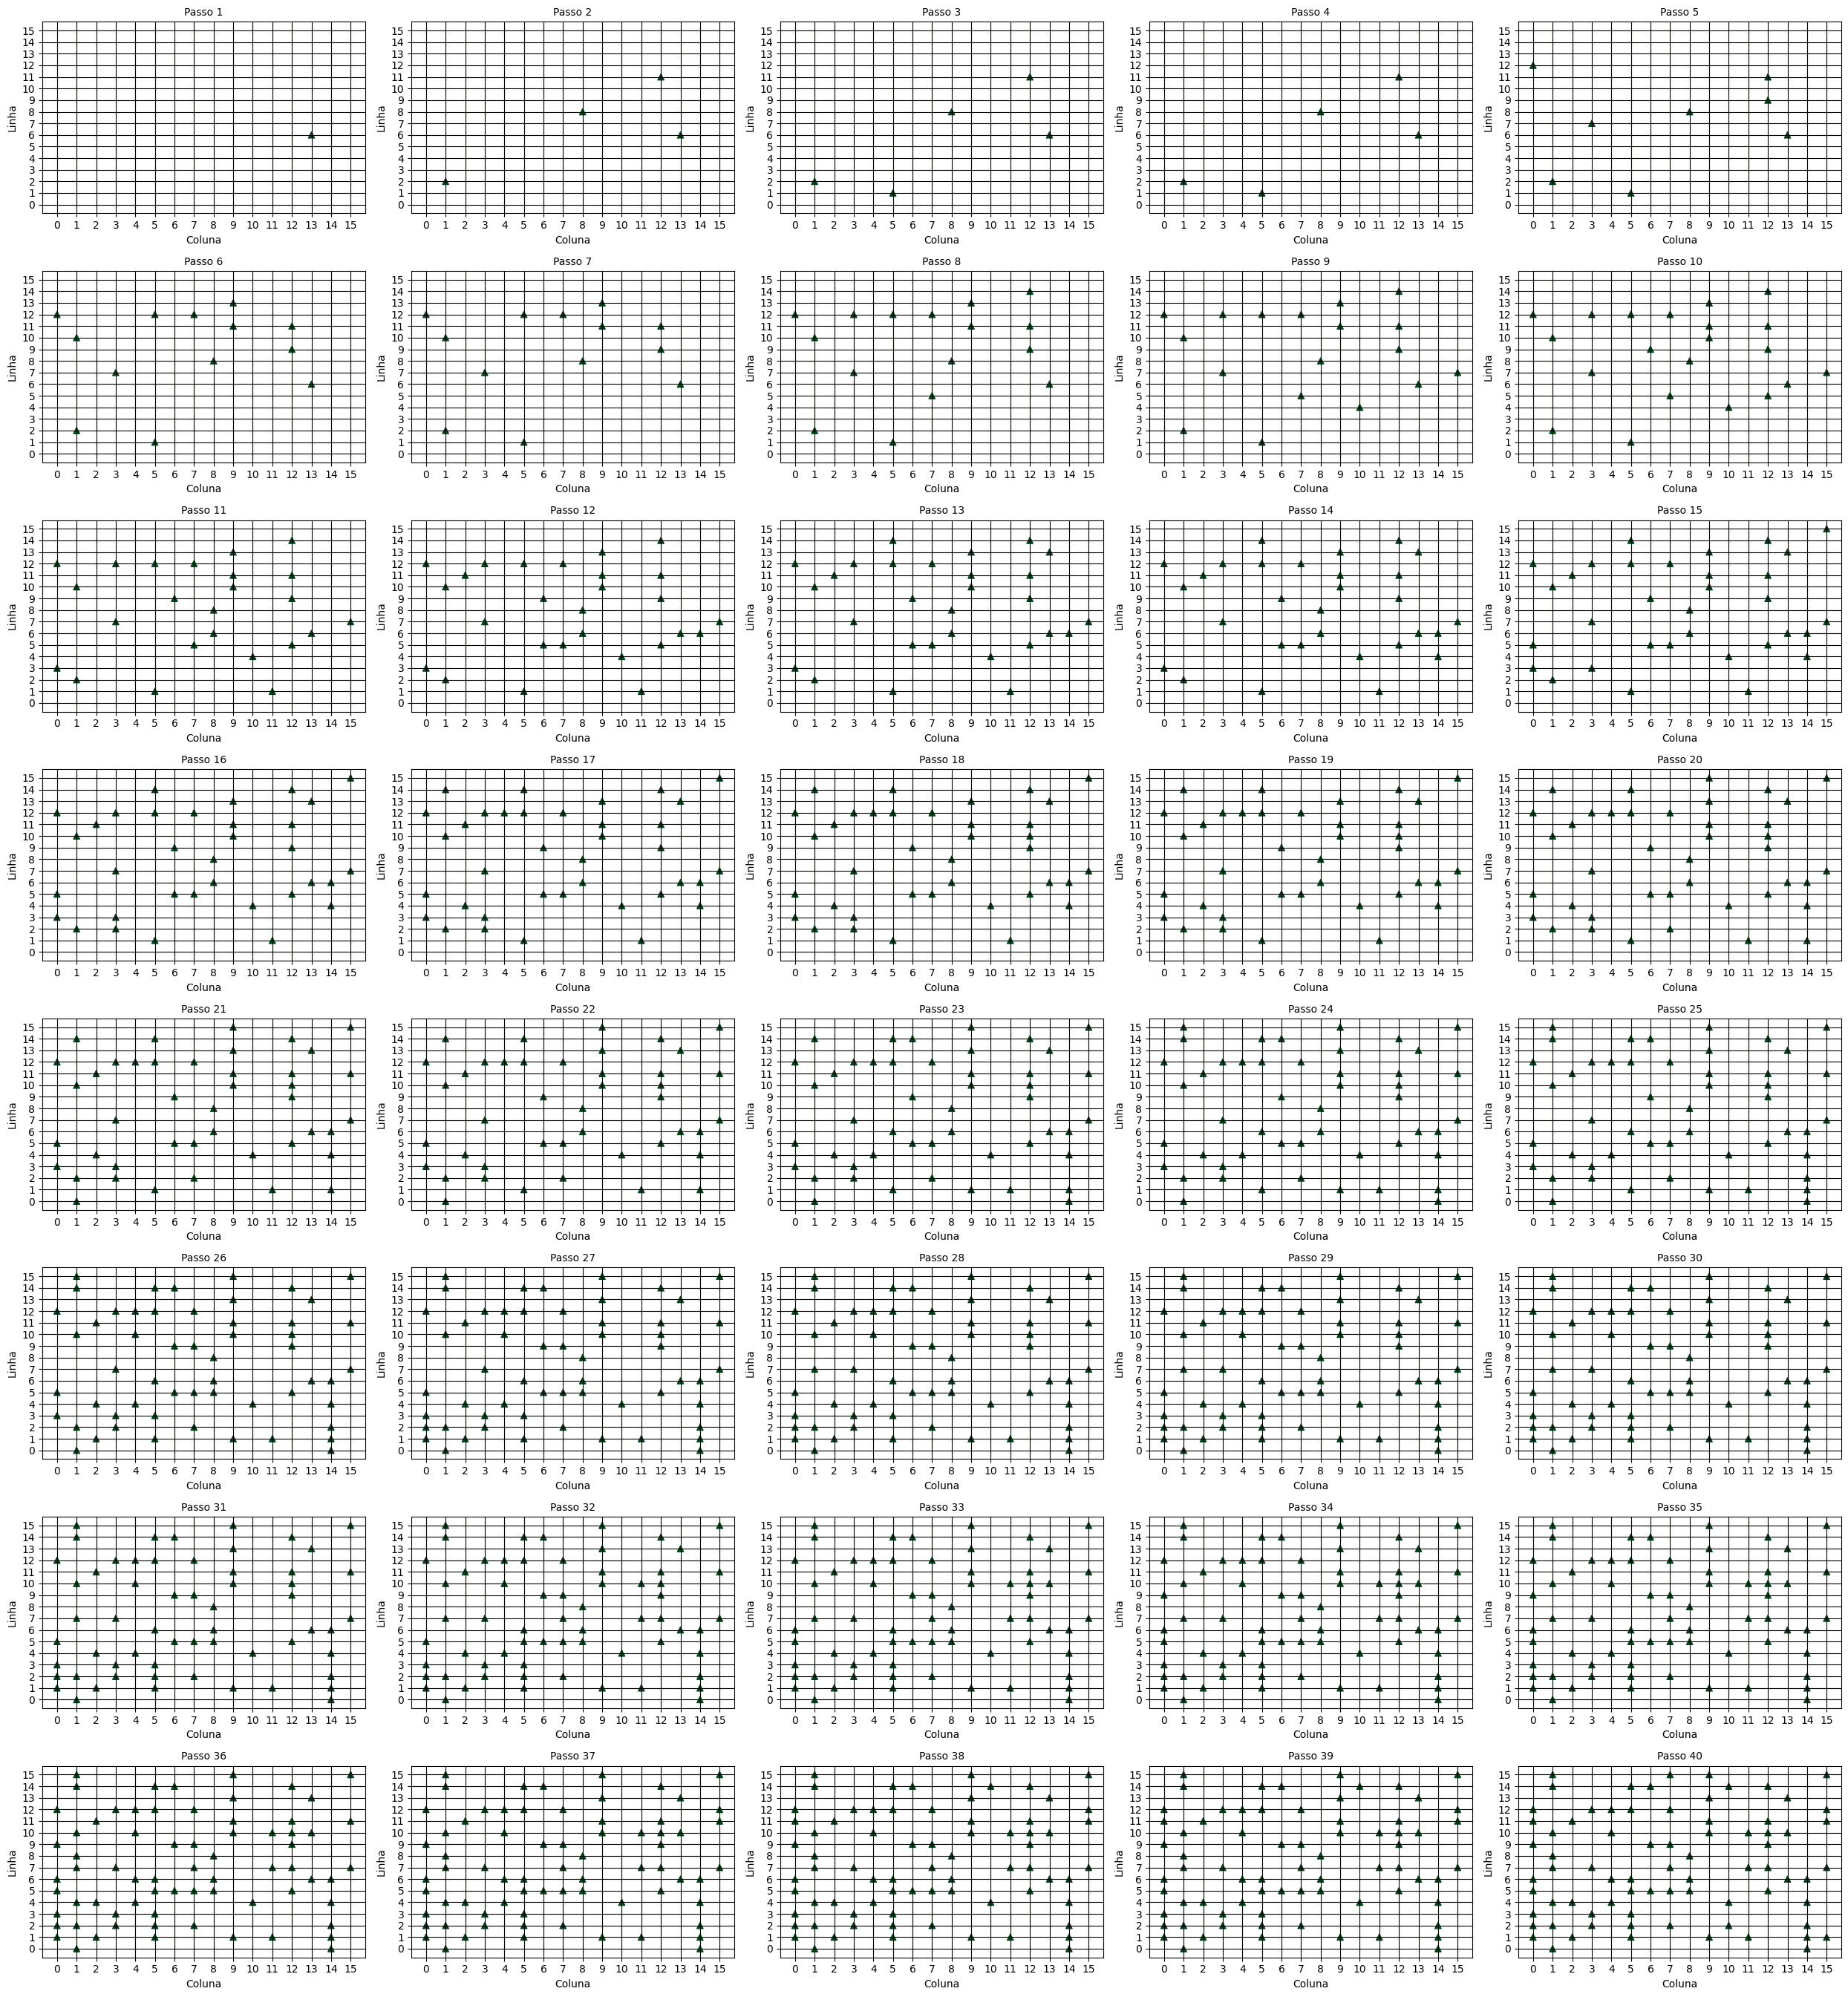

In [115]:
simular1a(L=16, T=40, p=0.01, f=0.2)


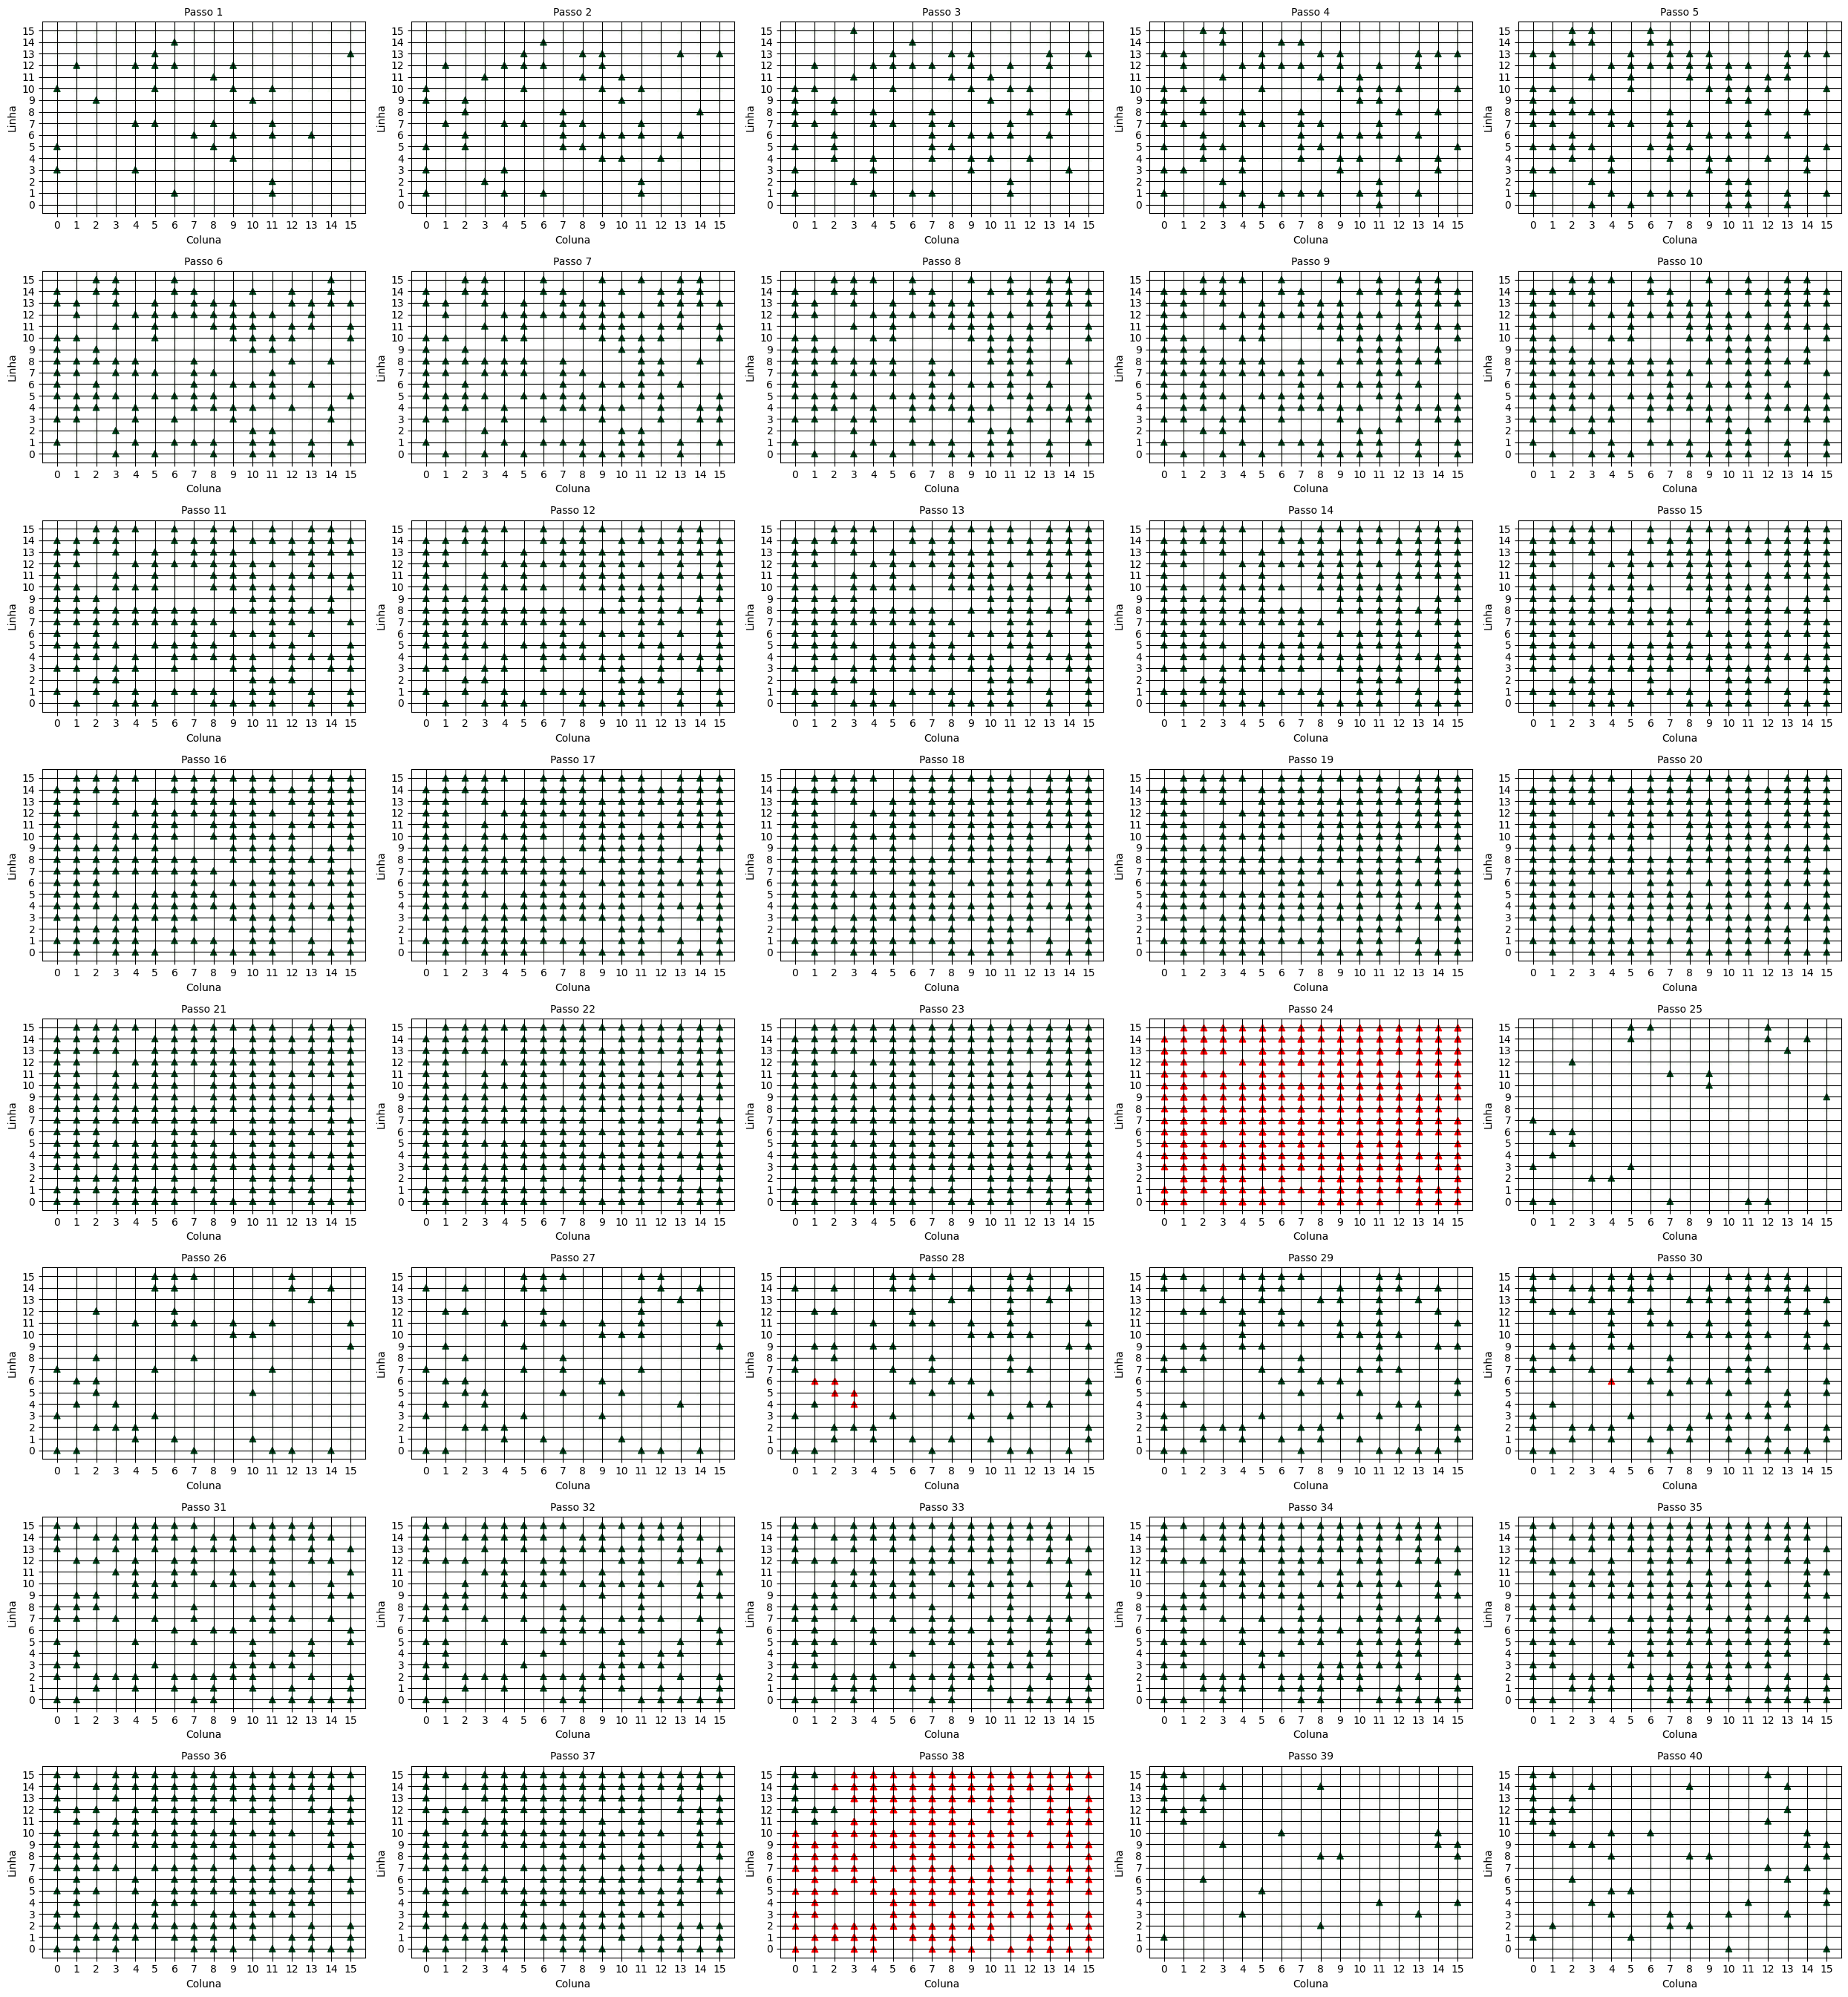

In [116]:
simular1a(L=16, T=40, p=0.1, f=0.2)


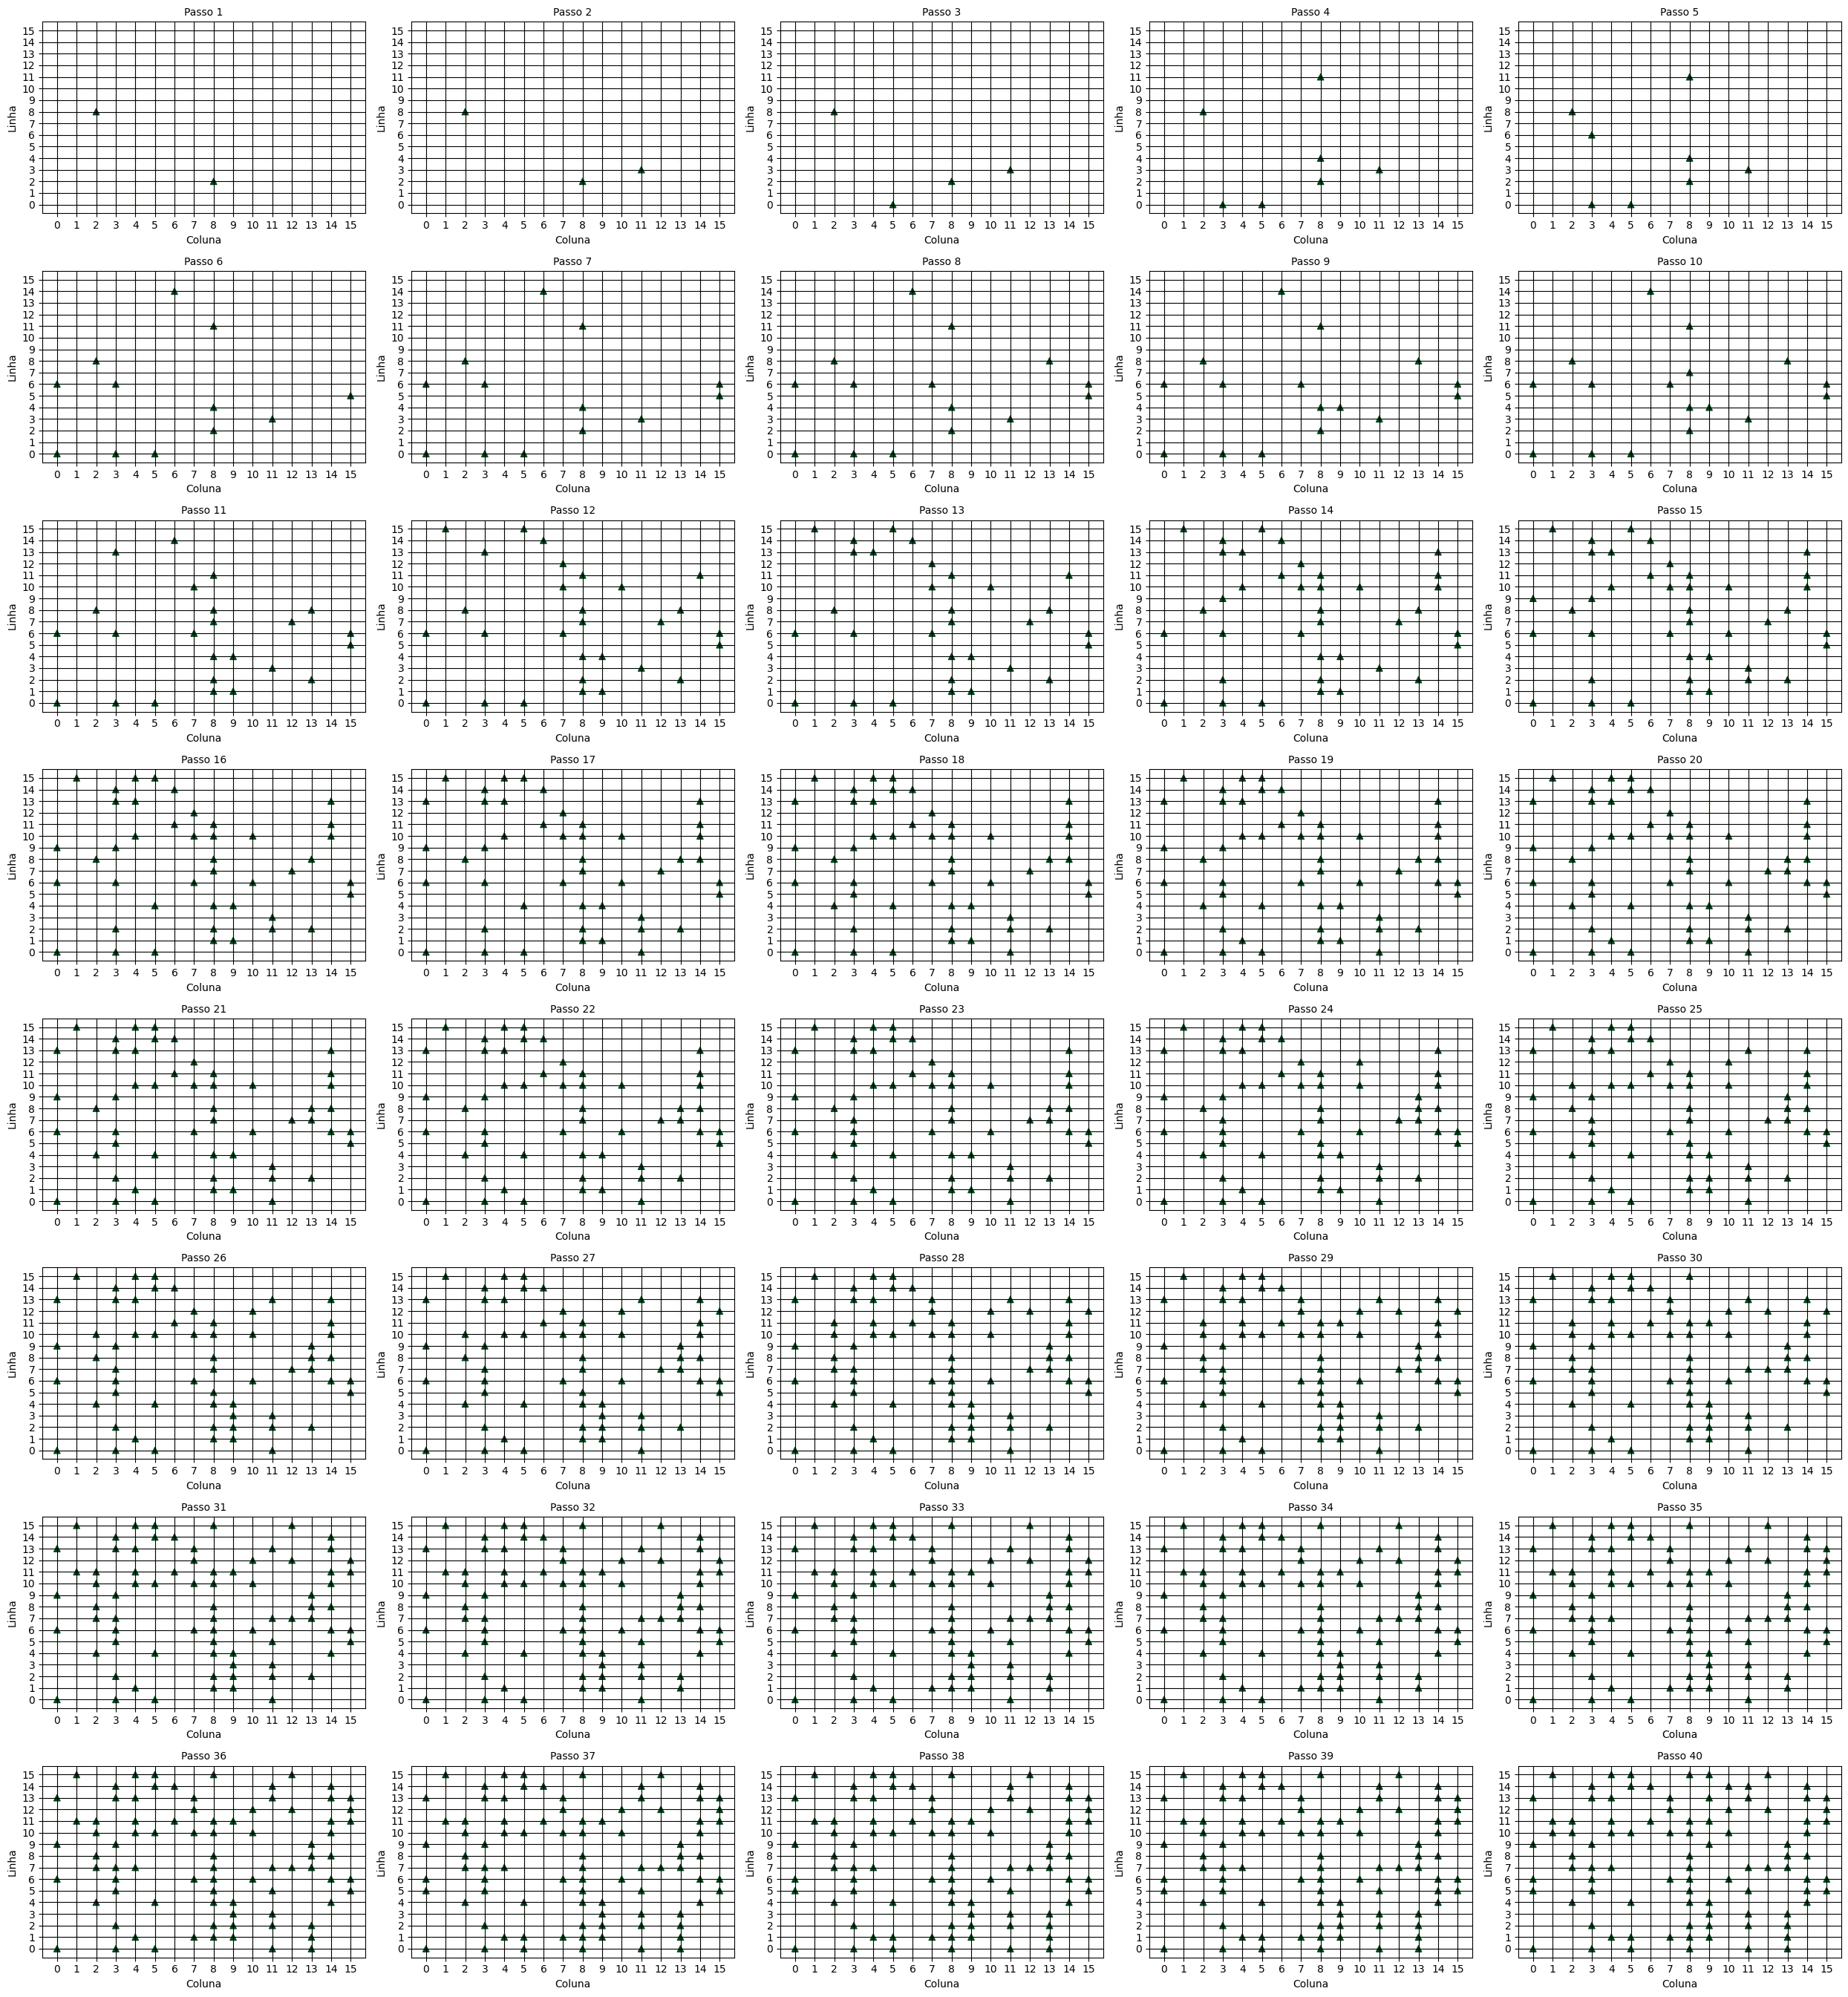

In [117]:
simular1a(L=16, T=40, p=0.01, f=0.02)


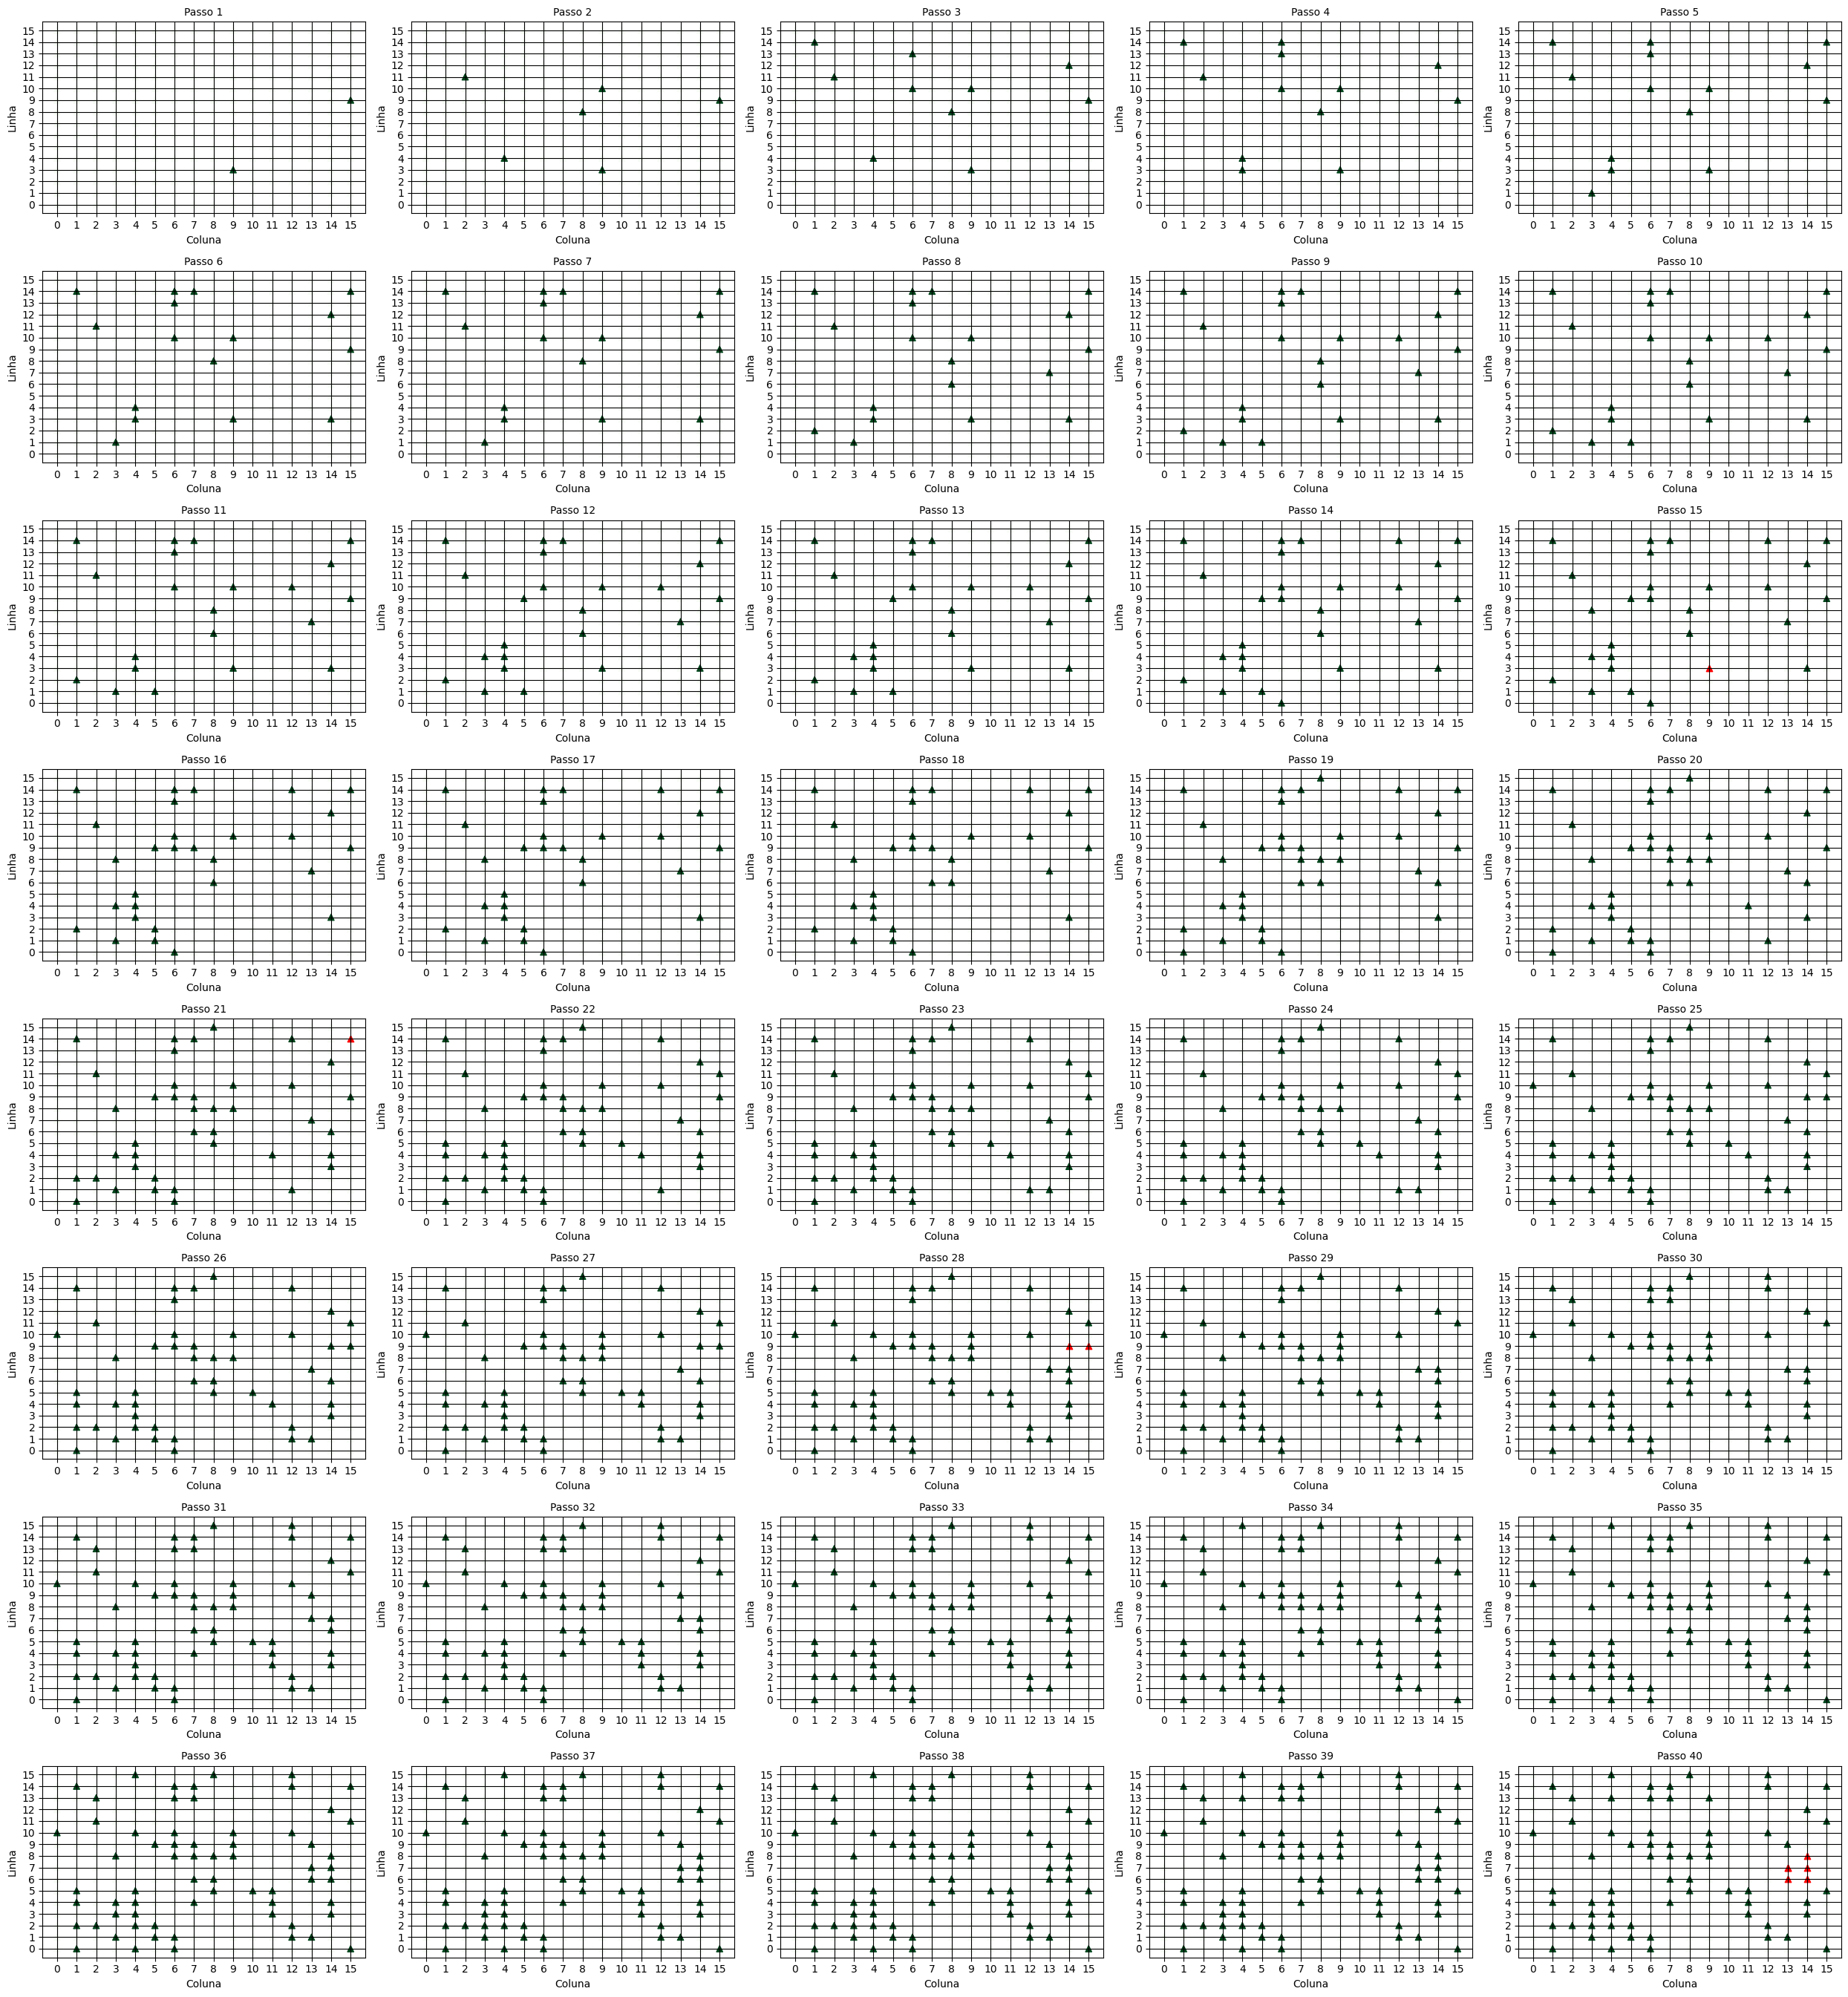

In [118]:
simular1a(L=16, T=40, p=0.01, f=0.8)


Com **p=0.01** e **f =0.2** os incendios eram raros provavelmente porque quando ocorriam eram em lugares que não tinham árvores e quando ocorriam eram pequenos devido ao fato das árvores estarem bem espalhadas. Porém quando multiplicamos o p por 10 ficando com **p=0.1** e **f =0.2** as árvores se espalhava muito rapidamente de maneira que quando ocorriam incendios ele era muito grande. Ja quando **p=0.01** e **f =0.8** os raios eram mais frequentes de maneira que quando eles ocorriam queimavam muito poucas árvores visto que não tinha um tempo hábil da floresta crescer muito

## 1 c

In [119]:

def simular1c(L, T, p, f):
    floresta = np.zeros((L, L), dtype=int)
    tamanho_queimadas = []
    for _ in range(T):
        # Adicione crescimento e raio, conforme implementado
        crescimento(floresta, p)
        queimadas = raio(floresta, f)
        if len(queimadas) > 0:
            tamanho_queimadas.append(len(queimadas))
            print(len(queimadas))
    plt.figure(figsize=(10, 6))
    plt.hist(tamanho_queimadas)
    plt.xlabel('Número de árvores queimadas')
    plt.ylabel('Frequência')
    plt.title('Histograma do Tamanho das Queimadas')
    plt.show()

1
126451
114763
100309
72989
130497
156
72633
8
73424
114699
8
73446
122354
100221
72831
100529
129582
128372
128345
130493
126544
122741
100187
122532


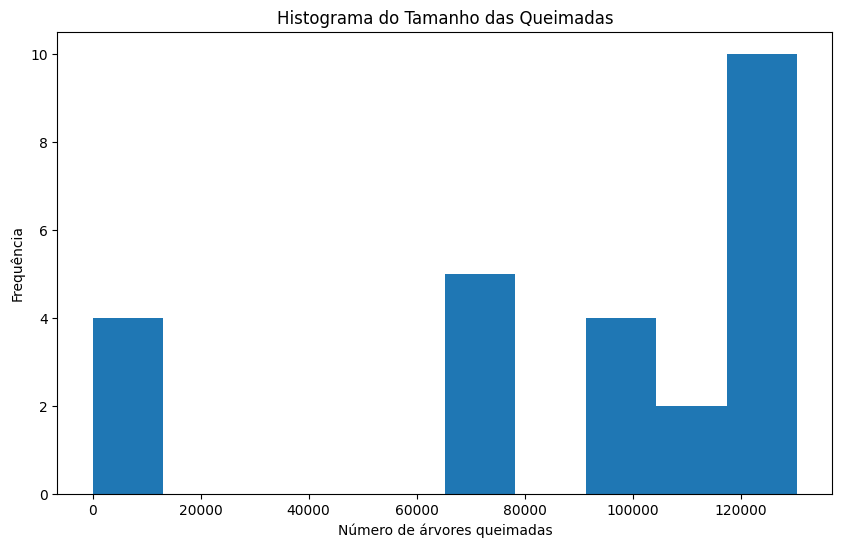

In [120]:
simular1c(L=256, T=104, p=0.5, f=0.3)


Aumentando muito o lado do quadrado e a quantidade de iterações para  **p=0.5** e **f=0.3** é perceptível que o ocorreram 25 incendios e eles variaram muito de tamanho, 4 deles menores que 160 e 21 maiores de 6000 mostrando que formaram-se clusters bem grandes.

# Parte 2

In [121]:

def simular2(L, p, f):
    floresta = np.zeros((L, L), dtype=int)
    tamanho_queimadas = []
    incendios=0
    while incendios<5000:
        crescimento(floresta, p)
        queimadas = raio(floresta, f)
        if len(queimadas) > 0:
            tamanho_queimadas.append(len(queimadas))
            incendios+=1
    tamanho_queimadas = np.array(tamanho_queimadas)
    sizes = np.arange(1, L*L + 1)
    cCDF = np.zeros_like(sizes, dtype=float)
    for i, size in enumerate(sizes):
        cCDF[i] = np.sum(tamanho_queimadas >= size) / len(tamanho_queimadas)
    
    plt.figure(figsize=(10, 6))
    plt.loglog(sizes / (L * L), cCDF, marker='o', linestyle='-', markersize=4)
    plt.xlabel('Tamanho Relativo do Incêndio (n/L^2)')
    plt.ylabel('cCDF (C(n))')
    plt.title(f'cCDF para L={L}')
    plt.grid(True)
    plt.show()


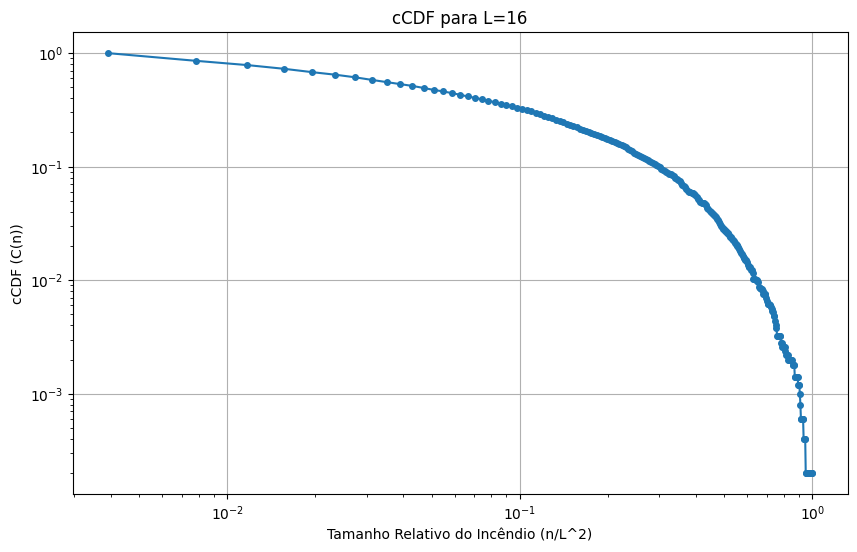

In [122]:
simular2(L=16, p=0.01, f=0.2)


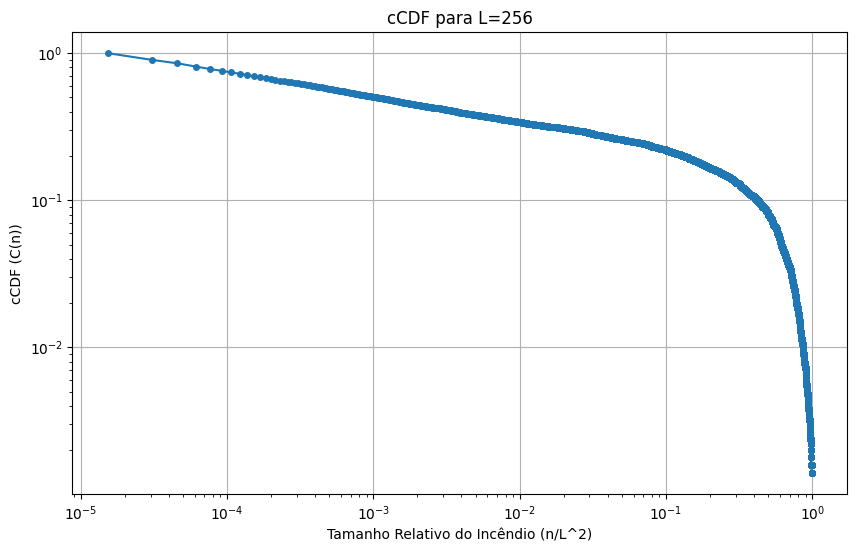

In [123]:
simular2(L=256, p=0.01, f=0.2)

O comportamento linear da cCDF é uma evidência de que os incêndios florestais simulados seguem uma lei de potência para uma grande gama de tamanhos. No entanto, os efeitos de borda e o tamanho finito da floresta causam desvios nos extremos da distribuição. Ao aumentar L, a seção linear da curva se expande, reforçando a natureza da lei de potência em incêndios florestais, à medida que os efeitos de borda se tornam menos significativos.
Essa análise reflete como o tamanho da floresta influencia a propagação dos incêndios e a forma da distribuição dos tamanhos dos incêndios, especialmente nos extremos da distribuição.

# Parte 3

## a

In [124]:
def gera_floresta_aleatoria(L, num_arvores):
    floresta = inicializa_floresta(L)
    indices = np.random.choice(L * L, num_arvores, replace=False)
    np.put(floresta, indices, 1)
    return floresta


In [128]:
def simular3(L, p, f,n_inc):
    floresta = inicializa_floresta(L)
    tamanho_queimadas = []
    tamanho_queimadas_aleatorias = []
    incendios = 0
    
    while incendios < n_inc:
        crescimento(floresta, p)
        queimadas = raio(floresta, f)
        if len(queimadas) > 0:
            tamanho_queimadas.append(len(queimadas))
            incendios += 1
            
            num_arvores = np.count_nonzero(floresta)
            floresta_aleatoria = gera_floresta_aleatoria(L, num_arvores)
            queimadas_aleatorias = raio(floresta_aleatoria, f)
            if len(queimadas_aleatorias) > 0:
                tamanho_queimadas_aleatorias.append(len(queimadas_aleatorias))

    tamanho_queimadas = np.array(tamanho_queimadas)
    tamanho_queimadas_aleatorias = np.array(tamanho_queimadas_aleatorias)
    
    sizes = np.arange(1, L*L + 1)
    cCDF_original = np.zeros_like(sizes, dtype=float)
    cCDF_aleatoria = np.zeros_like(sizes, dtype=float)

    for i, size in enumerate(sizes):
        cCDF_original[i] = np.sum(tamanho_queimadas >= size) / len(tamanho_queimadas)
        cCDF_aleatoria[i] = np.sum(tamanho_queimadas_aleatorias >= size) / len(tamanho_queimadas_aleatorias)

    plt.figure(figsize=(10, 6))
    plt.loglog(sizes / (L * L), cCDF_original, marker='o',  markersize=4, label='Floresta Original')
    plt.loglog(sizes / (L * L), cCDF_aleatoria, marker='s', markersize=4, label='Floresta Aleatória')
    plt.xlabel('Tamanho Relativo do Incêndio (n/L^2)')
    plt.ylabel('cCDF (C(n))')
    plt.title(f'cCDF para L={L}')
    plt.legend()
    plt.grid(True)
    plt.show()

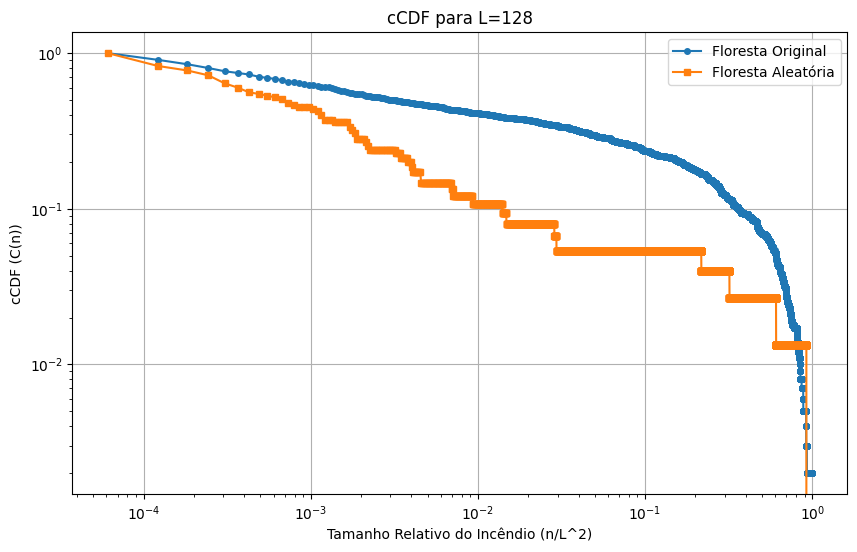

In [129]:
simular3(128, 0.01, 0.2,1000)


A cCDF da Floresta Original (linha azul) segue um comportamento típico de lei de potência, como vimos nas análises anteriores. Há uma faixa linear em uma escala log-log, indicando que incêndios de diferentes tamanhos ocorrem com uma distribuição de probabilidade que decai de acordo com uma lei de potência.
Em contraste, a Floresta Aleatória (linha laranja) mostra uma cCDF muito diferente. O comportamento da curva é mais "escalonado" e menos linear. Isso ocorre porque, na floresta aleatória, não há uma estrutura de vizinhança natural ou uma evolução dinâmica, o que resulta em incêndios com características diferentes dos incêndios em uma floresta que cresceu com incêndios.


## b

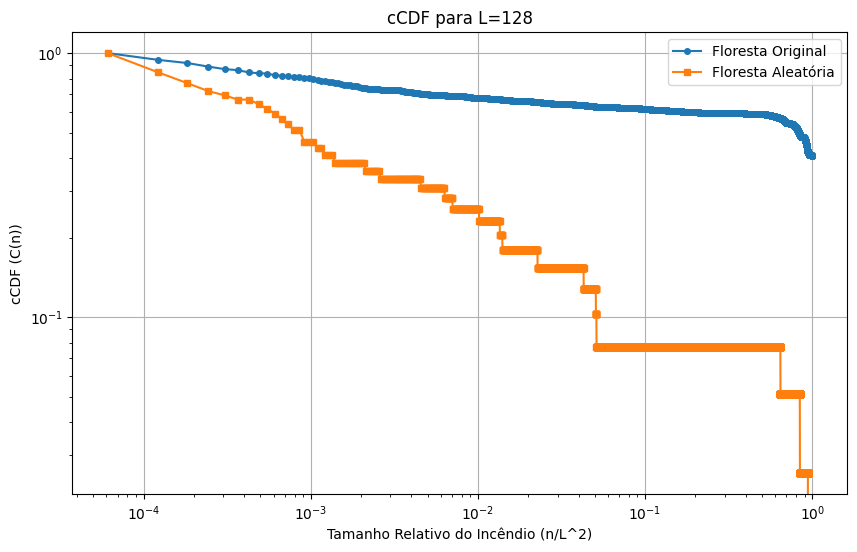

In [130]:
simular3(128, 0.1, 0.2,1000)


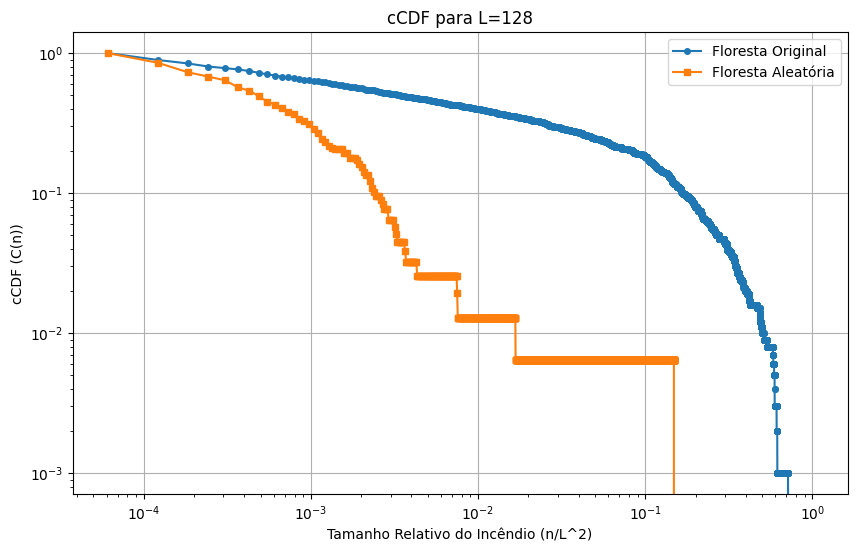

In [131]:
simular3(128, 0.01, 0.4,1000)


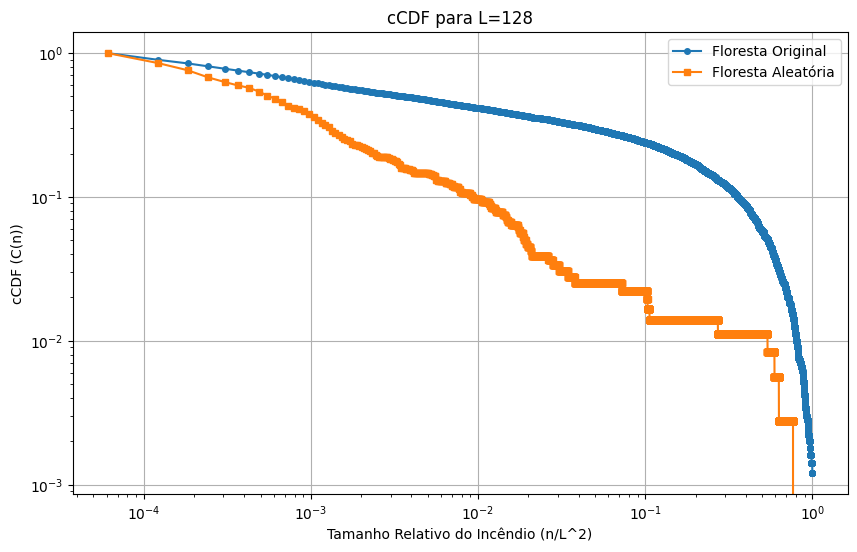

In [132]:
simular3(128, 0.01, 0.2,5000)


No primeiro gráfico, com **p=0.01**e **f=0.2**, observa-se que a curva da Floresta Original (em azul) se estende de forma mais contínua ao longo do eixo dos tamanhos relativos de incêndios, enquanto a curva da Floresta Aleatória (em laranja) apresenta uma queda mais abrupta e não atinge os valores mais baixos no eixo de tamanhos. Isso indica que a Floresta Original mostra uma maior diversidade de tamanhos de incêndio, o que é característico de um sistema que se aproxima de um comportamento de criticidade auto-organizada. A Floresta Aleatória, por outro lado, apresenta uma menor variação e tende a exibir incêndios maiores e menos diversificados, sugerindo a falta de estrutura na conectividade das árvores.

No segundo gráfico, com **p=0.1** e **f=0.2**, o aumento da probabilidade de crescimento de árvores p faz com que a curva da Floresta Original continue a mostrar uma maior diversidade de tamanhos de incêndios em comparação com a Floresta Aleatória, mas agora a curva da Floresta Aleatória começa a se aproximar mais da curva da Floresta Original. O aumento em p resulta em uma floresta mais densa, o que pode causar uma maior conectividade entre as árvores. Mesmo na Floresta Aleatória, essa conectividade aumentada leva a uma distribuição de incêndios mais ampla, mas ainda não tão diversificada quanto na Floresta Original.

No terceiro gráfico, com **p=0.01** e **f=0.4**, observa-se que ao dobrar a frequência dos raios f, a curva da Floresta Original agora desce de forma mais acentuada na parte dos incêndios maiores, enquanto a curva da Floresta Aleatória permanece com uma queda acentuada, mas menos variada. Aumentar f aumenta a frequência de incêndios, o que reduz a possibilidade de formação de grandes clusters na Floresta Original, resultando em menos incêndios de grande escala. No entanto, a estrutura da Floresta Original ainda promove uma gama mais ampla de tamanhos de incêndios em comparação com a Floresta Aleatória.


No terceiro gráfico, com **p = 0.01** e **f = 0.2** após 5000 raios, observa-se que a curva da Floresta Original (em azul) exibe uma continuidade mais suave ao longo dos tamanhos relativos dos incêndios em comparação com a Floresta Aleatória (em laranja). Essa continuidade sugere uma gama diversificada de tamanhos de incêndio, típica de sistemas que se aproximam de criticidade auto-organizada. Já a Floresta Aleatória, embora apresente incêndios de tamanhos variados, mostra uma queda mais acentuada, indicando que a distribuição dos incêndios é mais limitada e tende a concentrar-se em eventos maiores.

# Parte 4

## a

In [134]:
def simular4(L, p, f, n_steps):

    # Inicializa a floresta
    floresta = inicializa_floresta(L)
    fire_sizes = []
    
    # Loop de simulação
    for step in range(n_steps):
        # Crescimento das árvores na floresta
        crescimento(floresta, p)
        
        # Ocorrência de raio e início do incêndio
        queimadas = raio(floresta, f)
        
        # Se houve incêndio, armazena o tamanho
        if queimadas:
            fire_sizes.append(len(queimadas))
    
    return fire_sizes


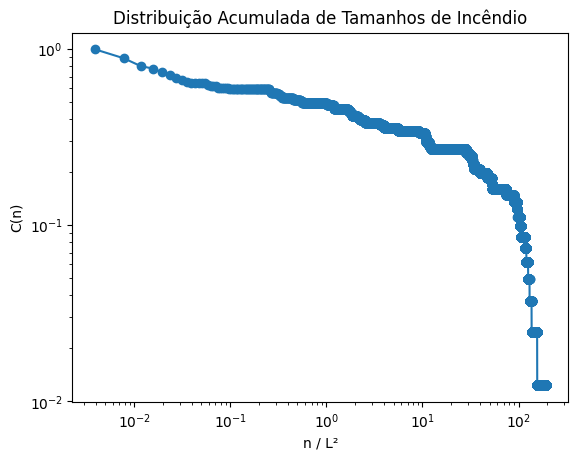

In [152]:
fire_sizes=simular4(256,0.01,0.2,1000)
n_bins = np.arange(1, np.max(fire_sizes)+1)
cdf = [np.sum(fire_sizes >= size)/len(fire_sizes) for size in n_bins]

plt.plot(n_bins / 256**2, cdf, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n / L²')
plt.ylabel('C(n)')
plt.title('Distribuição Acumulada de Tamanhos de Incêndio')
plt.show()

## b

In [155]:
def linear_fit(x, a, b):
    return a * x + b

In [156]:

def B_4(L):
    
    log_x = np.log(n_bins / L**2)
    log_y = np.log(cdf)
    initial_cut = np.where(log_x < -2)[0]  

    popt, _ = curve_fit(linear_fit, log_x[initial_cut], log_y[initial_cut])
    beta = popt[0]
    alpha = 1 - beta

    plt.plot(log_x, log_y, marker='o', label='Dados')
    plt.plot(log_x, linear_fit(log_x, *popt), label=f'Ajuste linear: β = {beta:.2f}')
    plt.xlabel('log(n / L²)')
    plt.ylabel('log(C(n))')
    plt.title('Ajuste Linear da Distribuição de Incêndios')
    plt.legend()
    plt.show()

    print(f'Expoente α estimado: {alpha:.2f}')

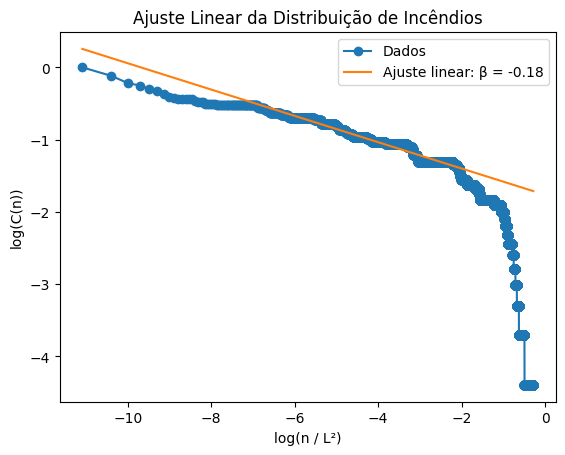

Expoente α estimado: 1.18


In [157]:
B_4(256,0.01,0.2,1000)

## c

O valor estimado para o expoente α=1.18 está muito próximo do valor de referência da literatura, α=1.15, essa proximidade sugere que o comportamento da nossa simulação está em boa concordância com os resultados teóricos esperados para distribuições do tipo lei de potência. Pequenas diferenças podem surgir devido a diversos fatores, como o número de passos de simulação, o tamanho da floresta (L), ou a seleção da faixa de ajuste da distribuição (especialmente na parte inicial, onde a lei de potência é mais evidente).

## d

In [158]:
def calcular_alpha(L, p, f, n_steps):
    fire_sizes = simular4(L, p, f, n_steps)
    
    n_bins = np.arange(1, np.max(fire_sizes)+1)
    cdf = [np.sum(fire_sizes >= size) / len(fire_sizes) for size in n_bins]
    
    plt.plot(n_bins / L**2, cdf, marker='o', label=f'p={p}, f={f}')
    plt.xscale('log')
    plt.yscale('log')
    
    log_x = np.log(n_bins / L**2)
    log_y = np.log(cdf)
    initial_cut = np.where(log_x < -2)[0] 
    
    popt, _ = curve_fit(linear_fit, log_x[initial_cut], log_y[initial_cut])
    beta = popt[0]
    alpha = 1 - beta
    
    print(f'Para p={p}, f={f}, o expoente α estimado é: {alpha:.2f}')
    
    return alpha

Para p=0.1, f=0.2, o expoente α estimado é: 1.03
Para p=0.01, f=0.4, o expoente α estimado é: 1.18


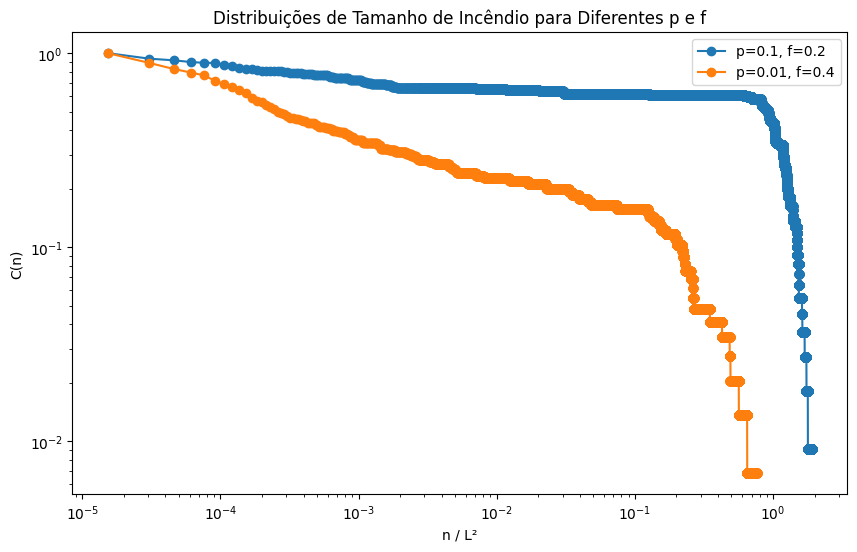

In [162]:

plt.figure(figsize=(10, 6))

alpha1 = calcular_alpha(256,0.1,0.2,1000)

alpha2 = calcular_alpha(256,0.01,0.4,1000)

plt.xlabel('n / L²')
plt.ylabel('C(n)')
plt.title('Distribuições de Tamanho de Incêndio para Diferentes p e f')
plt.legend()
plt.show()

No primeiro caso, com **p=0.1** e **f=0.2**, o valor estimado de **α foi de 1.03**. Esse resultado sugere que o sistema está em um regime próximo ao comportamento crítico, típico de distribuições de lei de potência. Aqui, a taxa de crescimento das árvores é moderada, levando à formação de clusters de tamanhos variados. O valor de α próximo de 1 significa que há uma coexistência entre incêndios pequenos e grandes, com uma leve predominância dos eventos menores. Esse regime é característico de sistemas que estão próximos do ponto crítico, onde flutuações grandes e pequenas ocorrem de maneira equilibrada.

No segundo caso, com **p=0.01** e **f=0.4**,devido à baixa densidade florestal e à alta frequência de raios, o sistema é dominado por incêndios pequenos. O valor de α=1.18 sugere uma forte inclinação em direção a pequenos eventos de queima, característica de sistemas onde distúrbios frequentes impedem o crescimento de grandes clusters de árvores.